In [2]:
!pip install --upgrade scikit-learn statsmodels mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [3]:
!pip install --upgrade statsmodels

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from sklearn.feature_selection import mutual_info_regression

In [5]:
raw = pd.read_csv('/content/EURUSD_D1.csv')

In [6]:
raw.head()

,Time,Open,High,Low,Close,Volume
0,27/08/2008 0:00,1.47356,1.47438,1.46625,1.47430,351296
1,28/08/2008 0:00,1.47462,1.48103,1.46691,1.47013,866737
2,29/08/2008 0:00,1.47026,1.47674,1.46368,1.46714,828348
3,31/08/2008 0:00,1.46748,1.47198,1.46748,1.46967,33247
4,01/09/2008 0:00,1.46962,1.47029,1.45543,1.45810,864080


In [7]:
raw['Time'] = pd.to_datetime(raw['Time'], dayfirst=True)

raw.set_index('Time', inplace=True)

df = raw.resample('D').mean()
df.fillna(method='ffill', inplace=True)

df.index.freq = 'D'

<ipython-input-7-b406188d3c70>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [8]:
df.index.freq

<Day>

In [9]:
df

,Open,High,Low,Close,Volume
Time,,,,,
2008-08-27,1.47356,1.47438,1.46625,1.47430,351296.0
2008-08-28,1.47462,1.48103,1.46691,1.47013,866737.0
2008-08-29,1.47026,1.47674,1.46368,1.46714,828348.0
2008-08-30,1.47026,1.47674,1.46368,1.46714,828348.0
2008-08-31,1.46748,1.47198,1.46748,1.46967,33247.0
...,...,...,...,...,...
2024-09-01,1.10462,1.10496,1.10440,1.10446,8177.0
2024-09-02,1.10445,1.10773,1.10419,1.10670,133709.0
2024-09-03,1.10671,1.10702,1.10263,1.10485,254603.0


In [10]:
df.describe()

,Open,High,Low,Close,Volume
count,5854.000000,5854.000000,5854.000000,5854.000000,5.854000e+03
mean,1.208646,1.213157,1.204074,1.208545,2.230076e+05
std,0.123300,0.124201,0.122265,0.123258,2.072771e+05
min,0.959530,0.967070,0.953570,0.959530,3.000000e+00
25%,1.104637,1.108400,1.101107,1.104300,8.350950e+04
50%,1.177450,1.180570,1.174125,1.177335,1.899620e+05
75%,1.317183,1.321835,1.311047,1.317295,2.623120e+05
max,1.512570,1.514410,1.503440,1.512520,1.723532e+06


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5854 entries, 2008-08-27 to 2024-09-05
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5854 non-null   float64
 1   High    5854 non-null   float64
 2   Low     5854 non-null   float64
 3   Close   5854 non-null   float64
 4   Volume  5854 non-null   float64
dtypes: float64(5)
memory usage: 274.4 KB


In [12]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [13]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


## Visualization

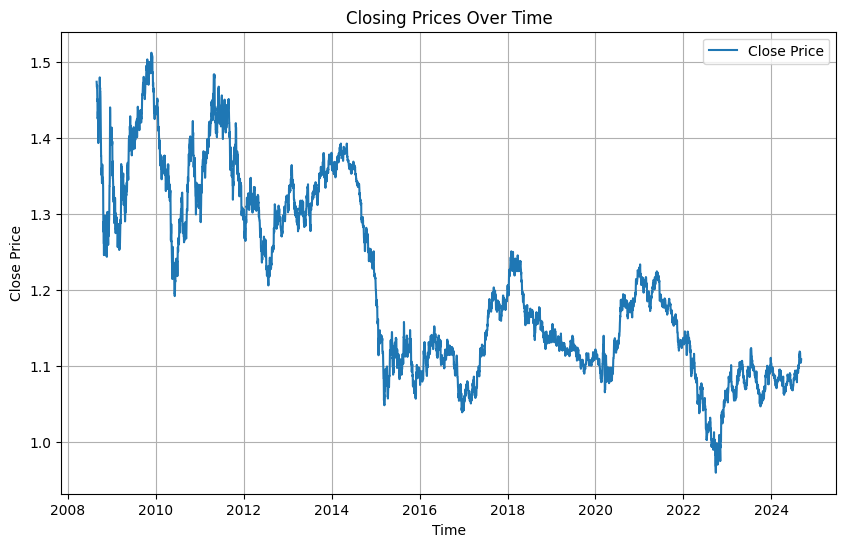

In [14]:
# 1. Line Chart for Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Closing Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

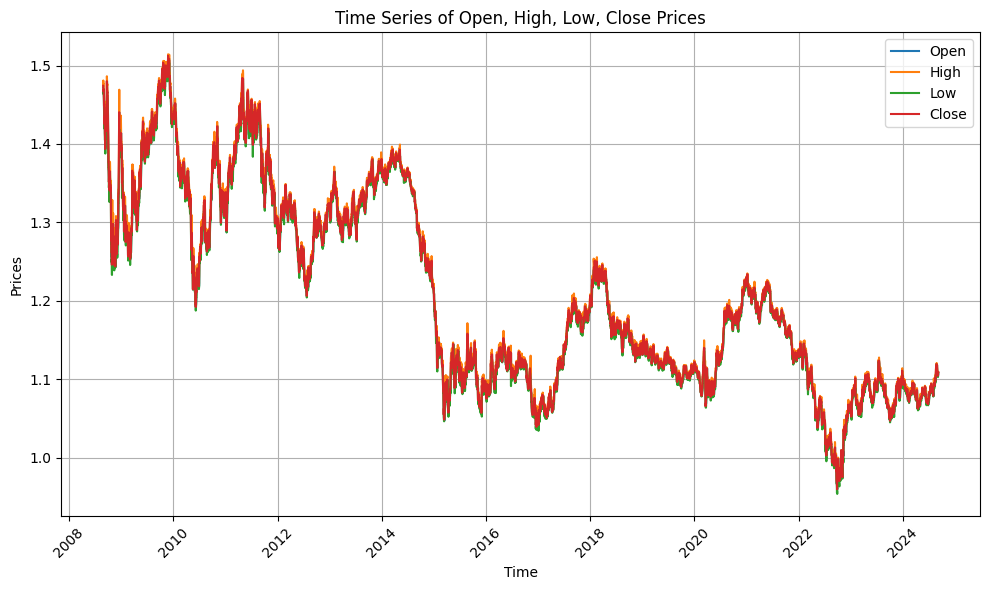

In [15]:
# Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Open'], label='Open')
plt.plot(df.index, df['High'], label='High')
plt.plot(df.index, df['Low'], label='Low')
plt.plot(df.index, df['Close'], label='Close')
plt.title('Time Series of Open, High, Low, Close Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


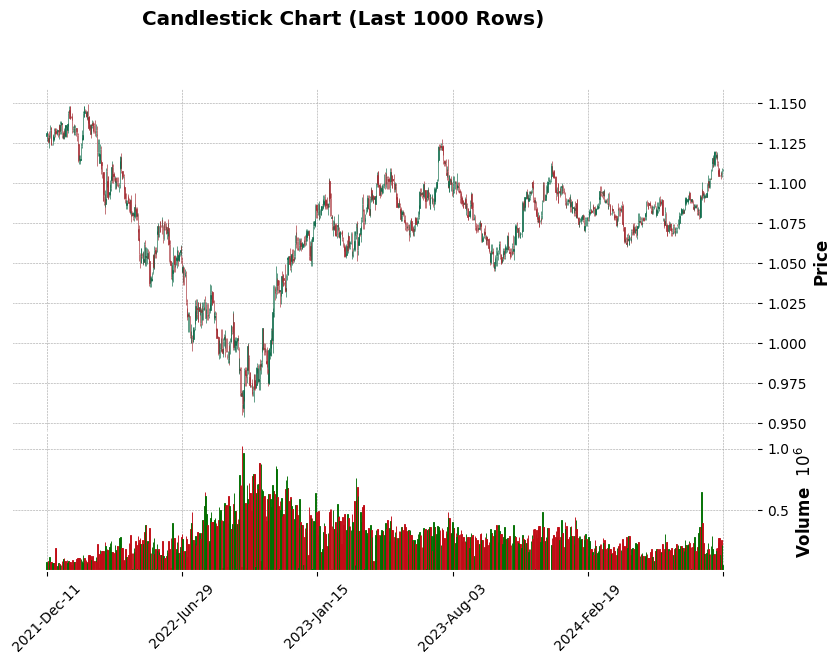

In [16]:
# Subset the last 1000 rows
subset_df = df[-1000:]  # You can adjust the number of rows here

# Plot the subset of data
mpf.plot(subset_df, type='candle', volume=True, style='charles', title='Candlestick Chart (Last 1000 Rows)',figratio=(12,8), figscale=1.2)


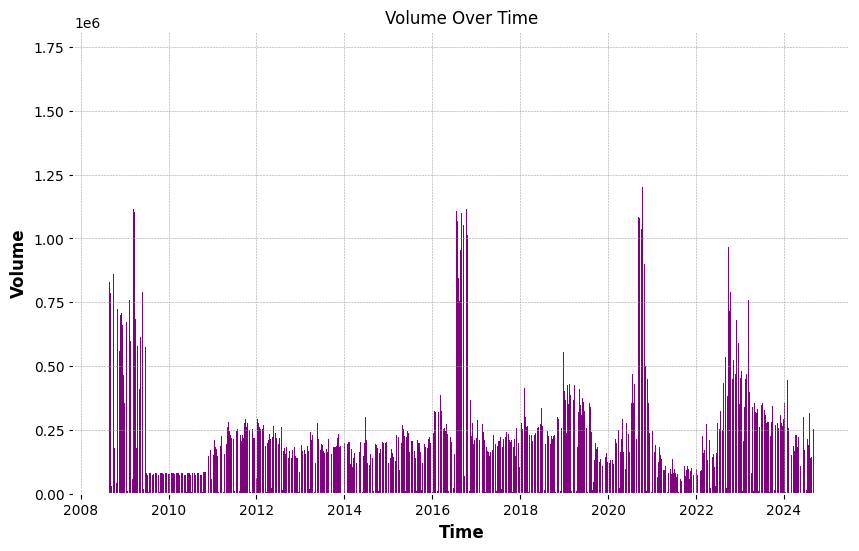

In [17]:
# 3. Volume Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Volume'], color='purple')
plt.title('Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


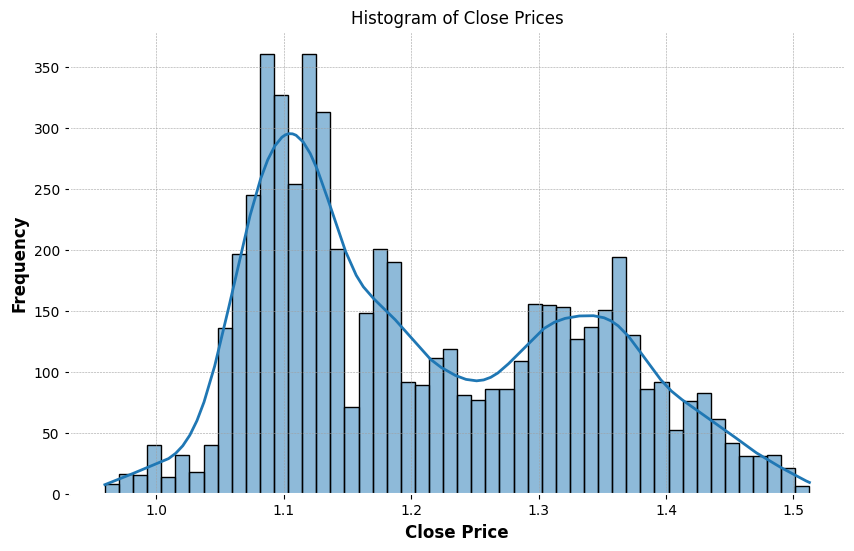

In [18]:
# 5. Histogram of Close Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

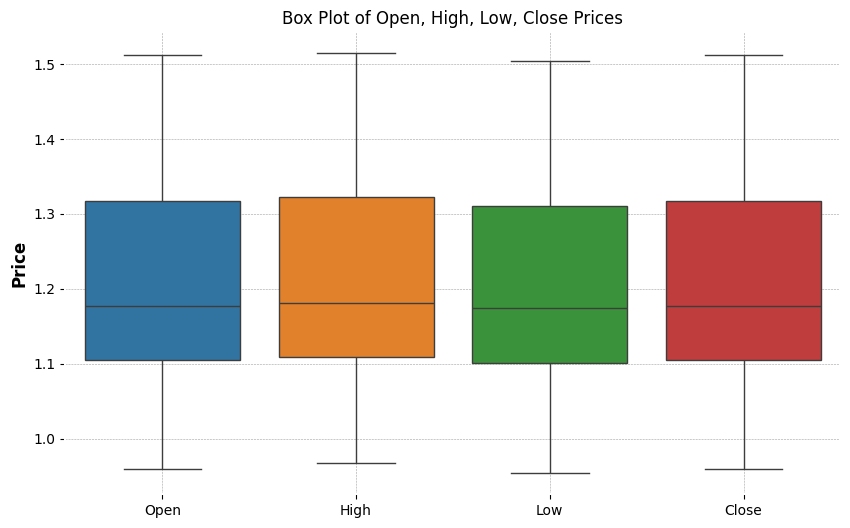

In [19]:
# 6. Box Plot for Price Types
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plot of Open, High, Low, Close Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

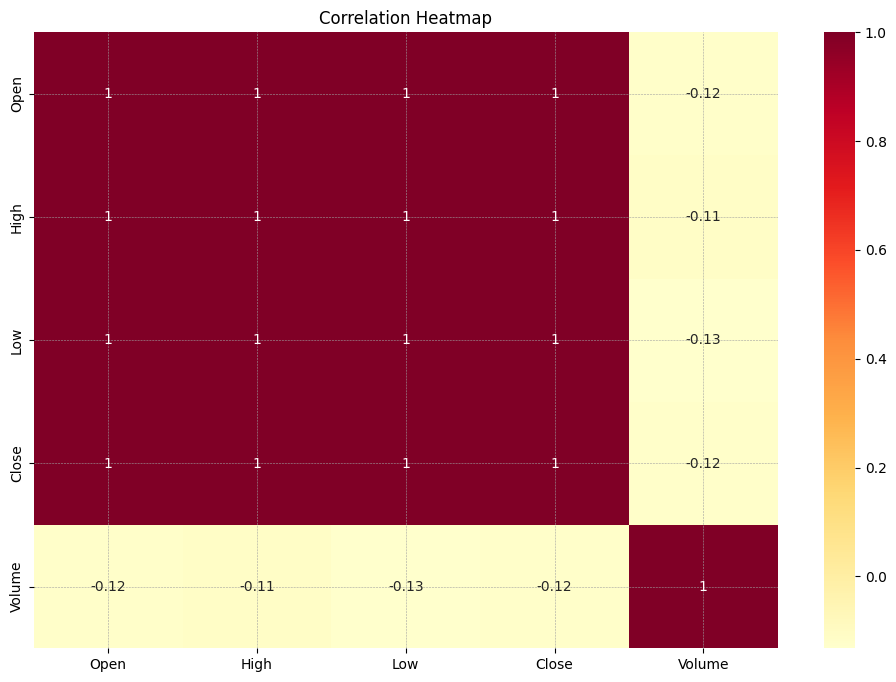

In [20]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

**Creating more features**

In [21]:
# 1. High-Low Range
df['High_Low_Range'] = df['High'] - df['Low']

# 2. Open-High Range
df['Open_High_Range'] = df['High'] - df['Open']

# 3. Open-Low Range
df['Open_Low_Range'] = df['Open'] - df['Low']

# 4. Rolling Volatility (using a 3-period window)
df['Rolling_Volatility'] = df[['Open', 'High', 'Low']].std(axis=1).rolling(window=3).mean()

# 5. True Range
df['True_Range'] = df.apply(lambda row: max(row['High'] - row['Low'], abs(row['High'] - row['Open']), abs(row['Low'] - row['Open'])), axis=1)

# 6. Moving Averages (SMA)
df['SMA_Open_3'] = df['Open'].rolling(window=3).mean()  # 3-period SMA of Open
df['SMA_High_3'] = df['High'].rolling(window=3).mean()  # 3-period SMA of High

# 7. Price Momentum (for Open and High, lag of 1 period)
df['Momentum_Open_1'] = df['Open'] - df['Open'].shift(1)
df['Momentum_High_1'] = df['High'] - df['High'].shift(1)

# 8. Exponential Moving Average (EMA) for Open (with a smoothing factor, alpha)
df['EMA_Open'] = df['Open'].ewm(span=3, adjust=False).mean()  # 3-period EMA of Open

# 9. Volume Change (percentage change)
df['Volume_Change'] = df['Volume'].pct_change() * 100

# 10. Moving Average of Volume (SMA)
df['SMA_Volume_3'] = df['Volume'].rolling(window=3).mean()

# 11. Lagged features for Open, High, Low, and Volume (lag of 1 period)
df['Lagged_Open_1'] = df['Open'].shift(1)
df['Lagged_High_1'] = df['High'].shift(1)
df['Lagged_Low_1'] = df['Low'].shift(1)
df['Lagged_Volume_1'] = df['Volume'].shift(1)

window = 14  # Common default period for RSI
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
df['RSI'] = 100 - (100 / (1 + gain / loss))

df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']


df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['Bollinger_Upper'] = df['SMA_20'] + 2 * df['Close'].rolling(window=20).std()
df['Bollinger_Lower'] = df['SMA_20'] - 2 * df['Close'].rolling(window=20).std()


df['Trend_Direction'] = np.where(df['Close'] > df['Open'], 1, -1)


df['Returns'] = df['Close'].pct_change()
df['Lagged_Returns_1'] = df['Returns'].shift(1)


df['EMA_Volume'] = df['Volume'].ewm(span=3, adjust=False).mean()


df['Range_5'] = df['High'].rolling(window=5).max() - df['Low'].rolling(window=5).min()




In [22]:
df.head()

,Open,High,Low,Close,Volume,High_Low_Range,Open_High_Range,Open_Low_Range,Rolling_Volatility,True_Range,...,EMA_26,MACD,SMA_20,Bollinger_Upper,Bollinger_Lower,Trend_Direction,Returns,Lagged_Returns_1,EMA_Volume,Range_5
Time,,,,,,,,,,,,,,,,,,,,,
2008-08-27,1.47356,1.47438,1.46625,1.47430,351296.0,0.00813,0.00082,0.00731,NaN,0.00813,...,1.474300,0.000000,NaN,NaN,NaN,1,NaN,NaN,351296.0000,NaN
2008-08-28,1.47462,1.48103,1.46691,1.47013,866737.0,0.01412,0.00641,0.00771,NaN,0.01412,...,1.473991,-0.000333,NaN,NaN,NaN,-1,-0.002828,NaN,609016.5000,NaN
2008-08-29,1.47026,1.47674,1.46368,1.46714,828348.0,0.01306,0.00648,0.00658,0.006025,0.01306,...,1.473484,-0.000828,NaN,NaN,NaN,-1,-0.002034,-0.002828,718682.2500,NaN
2008-08-30,1.47026,1.47674,1.46368,1.46714,828348.0,0.01306,0.00648,0.00658,0.006710,0.01306,...,1.473014,-0.001207,NaN,NaN,NaN,-1,0.000000,-0.002034,773515.1250,NaN
2008-08-31,1.46748,1.47198,1.46748,1.46967,33247.0,0.00450,0.00450,0.00000,0.005219,0.00450,...,1.472766,-0.001288,NaN,NaN,NaN,1,0.001724,0.000000,403381.0625,0.01735


In [23]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
High_Low_Range,0
Open_High_Range,0
Open_Low_Range,0
Rolling_Volatility,2
True_Range,0


In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
High_Low_Range,0
Open_High_Range,0
Open_Low_Range,0
Rolling_Volatility,0
True_Range,0


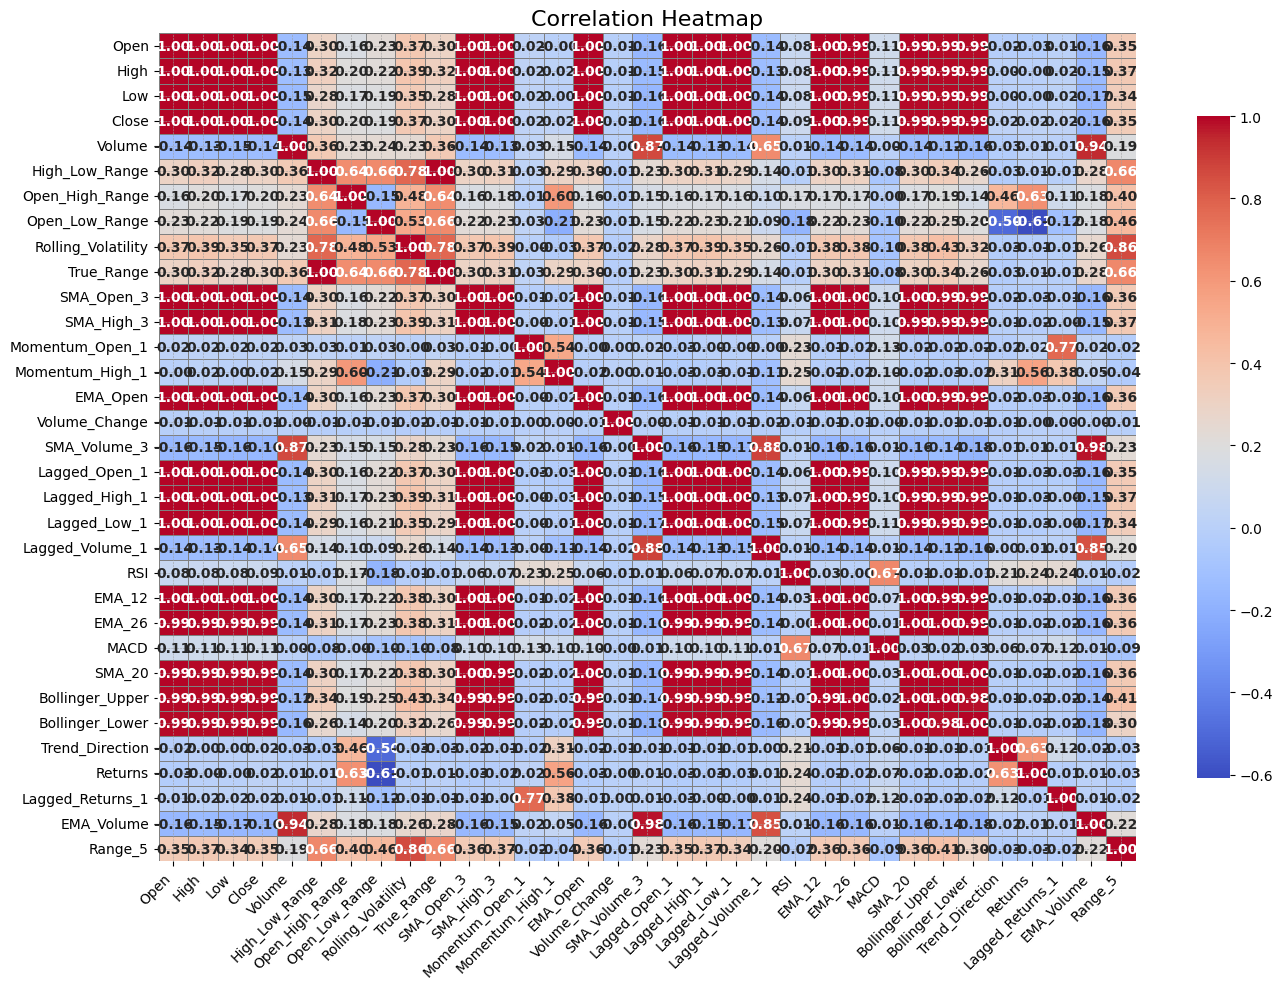

In [26]:
plt.figure(figsize=(14, 10))

corr = df.corr()
ax = sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 10, "weight": 'bold'},
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [27]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
High_Low_Range,0
Open_High_Range,0
Open_Low_Range,0
Rolling_Volatility,0
True_Range,0


# Feature Reduction

In [28]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def drop_multicollinear_features(df, threshold=5.0, main_features=None):
    """
    Drop features from the DataFrame that have high multicollinearity,
    excluding specified main features from the dropping process.

    Parameters:
    - df: pandas DataFrame with features.
    - threshold: VIF threshold above which features are considered collinear.
    - main_features: List of main features that should not be dropped.

    Returns:
    - DataFrame with collinear features removed.
    """

    def calculate_vif(X):
        # Ensure all data is numeric
        X = X.apply(pd.to_numeric, errors='coerce')
        # Drop rows with NaN values
        X = X.replace([np.inf, -np.inf], np.nan).dropna()

        vif = pd.DataFrame()
        vif['Features'] = X.columns
        vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        return vif

    if main_features is None:
        main_features = []

    # Initialize the list of features to drop
    features_to_drop = []

    while True:
        # Calculate VIF for each feature
        vif = calculate_vif(df)

        # Exclude main features from dropping
        vif = vif[~vif['Features'].isin(main_features)]

        # Check for features with VIF above the threshold
        high_vif = vif[vif['VIF'] > threshold]

        if high_vif.empty:
            # If no features have high VIF, exit the loop
            break

        # Drop the feature with the highest VIF
        feature_to_drop = high_vif.sort_values('VIF', ascending=False).iloc[0]['Features']
        features_to_drop.append(feature_to_drop)
        df = df.drop(columns=[feature_to_drop])

        print(f"Dropped feature '{feature_to_drop}' with VIF: {high_vif['VIF'].max()}")

    return df, features_to_drop

# Example usage
# Assuming 'df' is your DataFrame and you want to keep these main features
main_features = ['Open', 'High', 'Low', 'Close', 'Volume']

cleaned_df, dropped_features = drop_multicollinear_features(df, threshold=5.0, main_features=main_features)

print("Dropped Features:", dropped_features)
print("Remaining Features:", cleaned_df.columns)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'High_Low_Range' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'Open_High_Range' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'Open_Low_Range' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'Lagged_High_1' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'Bollinger_Upper' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'Momentum_Open_1' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'EMA_12' with VIF: inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature 'True_Range' with VIF: inf
Dropped feature 'EMA_Open' with VIF: 14647544.416742044
Dropped feature 'SMA_High_3' with VIF: 5241123.49150774
Dropped feature 'EMA_26' with VIF: 973107.5260692515
Dropped feature 'Lagged_Open_1' with VIF: 478329.7946594827
Dropped feature 'SMA_Open_3' with VIF: 330156.86712837714
Dropped feature 'Lagged_Low_1' with VIF: 301304.25915621966
Dropped feature 'SMA_20' with VIF: 60122.78439609405
Dropped feature 'Bollinger_Lower' with VIF: 12988.568709041978
Dropped feature 'EMA_Volume' with VIF: 468.29901239949083
Dropped feature 'SMA_Volume_3' with VIF: 39.86154923088073
Dropped feature 'Rolling_Volatility' with VIF: 31.77613511120946
Dropped feature 'RSI' with VIF: 15.02505498814198
Dropped feature 'Returns' with VIF: 9.623097878656731
Dropped feature 'Range_5' with VIF: 8.774825806109247
Dropped Features: ['High_Low_Range', 'Open_High_Range', 'Open_Low_Range', 'Lagged_High_1', 'Bollinger_Upper', 'Momentum_Open_1', 'EMA_12', 'True_Range', 'EMA_

In [29]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'High_Low_Range',
       'Open_High_Range', 'Open_Low_Range', 'Rolling_Volatility', 'True_Range',
       'SMA_Open_3', 'SMA_High_3', 'Momentum_Open_1', 'Momentum_High_1',
       'EMA_Open', 'Volume_Change', 'SMA_Volume_3', 'Lagged_Open_1',
       'Lagged_High_1', 'Lagged_Low_1', 'Lagged_Volume_1', 'RSI', 'EMA_12',
       'EMA_26', 'MACD', 'SMA_20', 'Bollinger_Upper', 'Bollinger_Lower',
       'Trend_Direction', 'Returns', 'Lagged_Returns_1', 'EMA_Volume',
       'Range_5'],
      dtype='object')

In [30]:
cleaned_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Momentum_High_1',
       'Volume_Change', 'Lagged_Volume_1', 'MACD', 'Trend_Direction',
       'Lagged_Returns_1'],
      dtype='object')

In [31]:
cleaned_df.describe()

,Open,High,Low,Close,Volume,Momentum_High_1,Volume_Change,Lagged_Volume_1,MACD,Trend_Direction,Lagged_Returns_1
count,5835.000000,5835.000000,5835.000000,5835.000000,5.835000e+03,5835.000000,5.835000e+03,5.835000e+03,5835.000000,5835.000000,5835.000000
mean,1.207897,1.212395,1.203340,1.207799,2.214809e+05,-0.000056,1.465361e+03,2.214778e+05,-0.000417,0.013539,-0.000031
std,0.122788,0.123676,0.121773,0.122755,2.051597e+05,0.005878,8.387731e+04,2.051624e+05,0.006739,0.999994,0.004890
min,0.959530,0.967070,0.953570,0.959530,3.000000e+00,-0.040000,-9.999903e+01,3.000000e+00,-0.036509,-1.000000,-0.026726
25%,1.104495,1.108130,1.100980,1.104045,8.331800e+04,-0.002220,-1.199498e+01,8.331800e+04,-0.003921,-1.000000,-0.001989
50%,1.177220,1.180270,1.173480,1.177110,1.897650e+05,0.000000,0.000000e+00,1.897650e+05,-0.000345,1.000000,0.000000
75%,1.315850,1.321020,1.309805,1.315935,2.619815e+05,0.002305,1.699645e+01,2.619815e+05,0.003499,1.000000,0.001855
max,1.512570,1.514410,1.503440,1.512520,1.723532e+06,0.049350,6.406933e+06,1.723532e+06,0.035439,1.000000,0.034914


**FEATURE REDUCTION USING PCA**

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [33]:
# Define the columns
pca_columns = ['High_Low_Range', 'Open_High_Range', 'Open_Low_Range',
               'Rolling_Volatility', 'True_Range', 'SMA_Open_3',
               'SMA_High_3', 'Momentum_Open_1', 'Momentum_High_1',
               'EMA_Open', 'Volume_Change', 'SMA_Volume_3',
               'Lagged_Open_1', 'Lagged_High_1', 'Lagged_Low_1',
               'Lagged_Volume_1', 'RSI', 'EMA_12', 'EMA_26',
               'MACD', 'SMA_20', 'Bollinger_Upper',
               'Bollinger_Lower', 'Trend_Direction',
               'Returns', 'Lagged_Returns_1', 'EMA_Volume',
               'Range_5']

pca_data = df[pca_columns]
original_data = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [34]:
# Standardize the data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

In [35]:
pca = PCA()
pca_components = pca.fit_transform(pca_data_scaled)

# Create descriptive names for the components
n_components = pca.n_components_
component_names = [f'Principal Component {i+1}' for i in range(n_components)]

# Create a DataFrame with PCA components and descriptive names
pca_df = pd.DataFrame(data=pca_components, columns=component_names)


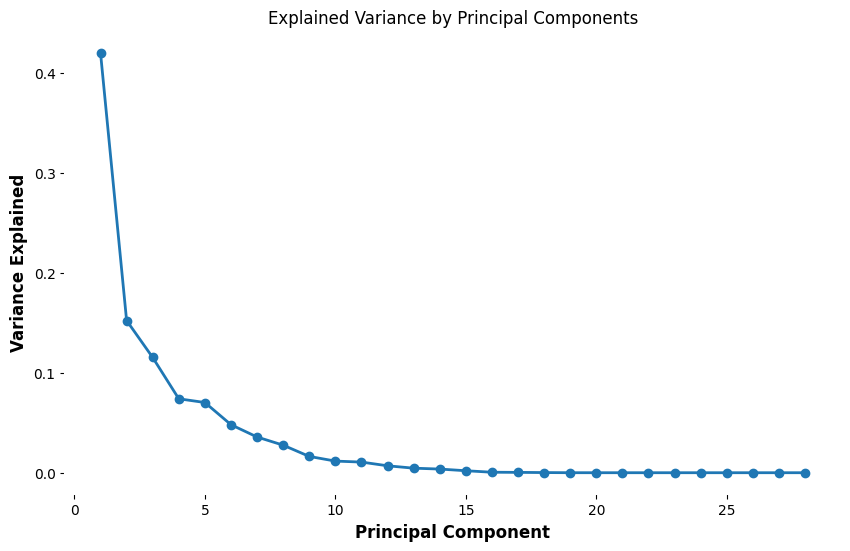

In [36]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()

In [113]:
n_components_to_keep = 6
reduced_pca_df = pd.DataFrame(data=pca_df.iloc[:, :n_components_to_keep])

In [114]:
# Combine reduced PCA components with original data
combined_reduced_df = pd.concat([df[['Open', 'High', 'Low', 'Close', 'Volume']].reset_index(drop=False),
                                   reduced_pca_df.reset_index(drop=True)], axis=1)

In [115]:
# If 'Time' is a column in your DataFrame
combined_reduced_df['Time'] = pd.to_datetime(combined_reduced_df['Time'])
combined_reduced_df.set_index('Time', inplace=True)

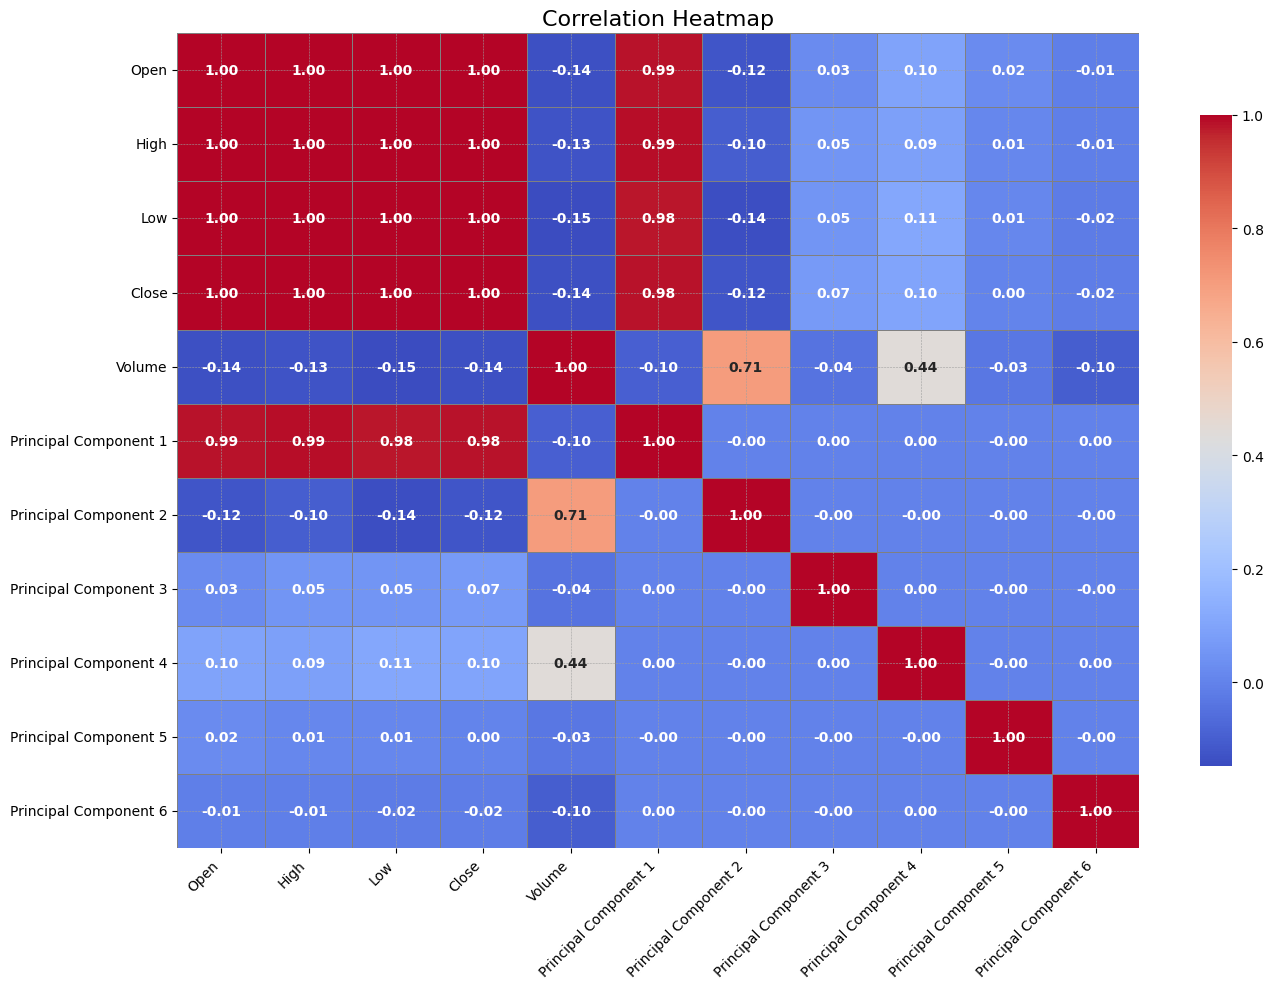

In [116]:
plt.figure(figsize=(14, 10))

corr = combined_reduced_df.corr()
ax = sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 10, "weight": 'bold'},
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

**Splitting Data**

In [141]:
# Define the split ratio
train_size = 0.8  # 80% for training, 20% for testing

# Calculate the index for splitting
train_index = int(len(combined_reduced_df) * train_size)

# Split the DataFrame into training and testing sets
for_training = combined_reduced_df.iloc[:train_index]  # Training set
X_test = combined_reduced_df.iloc[train_index:]   # Testing set


In [142]:
# Display the shapes of the resulting DataFrames
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (4667, 11)
Testing set shape: (1167, 11)


## Correcting Non-stationary behaviour

In [143]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def differencing(df, columns=None, max_differences=2):
    """
    Apply differencing to correct non-stationary nature of specified columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame with time series data.
    - columns: List of columns to check and difference. If None, all columns are processed.
    - max_differences: Maximum number of differencing operations to apply.

    Returns:
    - DataFrame with differenced columns.
    """

    if columns is None:
        columns = df.columns

    def check_stationarity(series):
        """
        Check if a series is stationary using the ADF test.
        """
        result = adfuller(series.dropna())
        return result[1] < 0.05  # p-value < 0.05 indicates stationarity

    def apply_differencing(series, max_differences):
        """
        Apply differencing to a series until it is stationary or the max number of differences is reached.
        """
        differenced_series = series.copy()
        for i in range(max_differences):
            if check_stationarity(differenced_series):
                break
            differenced_series = differenced_series.diff().dropna()
        return differenced_series

    # Create a copy of the DataFrame to avoid modifying the original data
    df_differenced = df.copy()

    # Apply differencing to each specified column
    for col in columns:
        if not check_stationarity(df[col]):
            print(f"Column '{col}' is non-stationary. Applying differencing...")
            df_differenced[col] = apply_differencing(df[col], max_differences)
        else:
            print(f"Column '{col}' is already stationary.")

    return df_differenced





In [150]:
# Assuming 'df' is your DataFrame with time series data
X_train = differencing(for_training)

Column 'Open' is non-stationary. Applying differencing...
Column 'High' is non-stationary. Applying differencing...
Column 'Low' is non-stationary. Applying differencing...
Column 'Close' is non-stationary. Applying differencing...
Column 'Volume' is already stationary.
Column 'Principal Component 1' is non-stationary. Applying differencing...
Column 'Principal Component 2' is already stationary.
Column 'Principal Component 3' is already stationary.
Column 'Principal Component 4' is already stationary.
Column 'Principal Component 5' is already stationary.
Column 'Principal Component 6' is already stationary.


In [151]:
X_train = differencing(X_train)

Column 'Open' is already stationary.
Column 'High' is already stationary.
Column 'Low' is already stationary.
Column 'Close' is already stationary.
Column 'Volume' is already stationary.
Column 'Principal Component 1' is already stationary.
Column 'Principal Component 2' is already stationary.
Column 'Principal Component 3' is already stationary.
Column 'Principal Component 4' is already stationary.
Column 'Principal Component 5' is already stationary.
Column 'Principal Component 6' is already stationary.


In [152]:
X_train

,Open,High,Low,Close,Volume,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6
Time,,,,,,,,,,,
2008-09-15,NaN,NaN,NaN,NaN,860968.0,NaN,7.816250,-0.454711,-2.922357,2.547236,-1.645991
2008-09-16,-0.00741,-0.01995,-0.00121,-0.00769,864027.0,-1.357753,4.991110,-4.904329,2.214791,-1.476241,-0.497861
2008-09-17,-0.00756,0.01011,0.00267,0.01694,861225.0,0.329944,8.016427,1.612999,1.329755,-3.704592,-1.317636
2008-09-18,0.01686,0.01567,0.01806,-0.00365,858985.0,-0.266495,7.471672,1.919718,2.253206,2.076270,-3.393400
2008-09-19,-0.00371,-0.00429,-0.01278,0.01661,785263.0,0.760813,8.529035,0.503412,1.301722,-2.528110,-0.176462
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-22,0.00416,0.00313,0.00332,0.00245,90408.0,-0.089932,-1.281802,0.788435,-1.092950,-0.050111,-1.946236
2021-06-23,0.00245,0.00174,0.00305,-0.00068,89389.0,0.025157,-1.441056,-0.492430,-0.993193,0.351910,-1.705757
2021-06-24,-0.00067,-0.00138,0.00063,-0.00018,81793.0,-0.127803,-1.967943,-0.875227,-0.727740,-0.364371,-1.392128


In [153]:
X_train.isnull().sum()

,0
Open,1
High,1
Low,1
Close,1
Volume,0
Principal Component 1,1
Principal Component 2,0
Principal Component 3,0
Principal Component 4,0
Principal Component 5,0


In [154]:
X_train.dropna(inplace=True)

In [155]:
X_train.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Principal Component 1,0
Principal Component 2,0
Principal Component 3,0
Principal Component 4,0
Principal Component 5,0


## Splitting the Data

In [156]:
X_train = X_train.asfreq('D')

In [157]:
print("Current Frequency:", X_train.index.freq)

Current Frequency: <Day>


In [158]:
X_train.describe()

,Open,High,Low,Close,Volume,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6
count,4667.000000,4667.000000,4667.000000,4667.000000,4.667000e+03,4667.000000,4667.000000,4667.000000,4667.000000,4667.000000,4667.000000
mean,-0.000051,-0.000054,-0.000046,-0.000049,2.194065e+05,-0.001931,-0.009330,0.014193,0.048798,-0.015206,-0.021728
std,0.006511,0.006233,0.005956,0.006437,2.111796e+05,0.459681,2.134921,1.877052,1.530539,1.463158,1.217036
min,-0.036000,-0.040000,-0.036100,-0.038200,3.000000e+00,-3.087233,-4.298758,-10.512467,-8.099769,-7.607814,-6.313017
25%,-0.002380,-0.002345,-0.002440,-0.002545,8.341550e+04,-0.215718,-1.391502,-1.135358,-0.745735,-0.748296,-0.845223
50%,0.000000,0.000000,0.000000,0.000000,1.878800e+05,-0.003102,-0.400109,0.002033,-0.060414,-0.023479,-0.044431
75%,0.002420,0.002545,0.002220,0.002445,2.482110e+05,0.214175,0.761946,1.190427,0.680625,0.725069,0.755609
max,0.045500,0.049350,0.043050,0.045500,1.723532e+06,3.569815,14.779989,11.345933,8.325490,8.529284,9.400588


## Training and Evaluating Models

In [159]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.hypothesis_test_results import CausalityTestResults
from statsmodels.tsa.vector_ar.irf import IRAnalysis

### VAR MODEL

#### Selecting the Best Hyperparameters (Optimal Lags)

In [160]:
def find_best_lag(df, max_lags=15):
    """
    Find the best lag order manually by fitting VAR models with different lags.

    Parameters:
    - df: pandas DataFrame with time series data.
    - max_lags: maximum number of lags to consider.

    Returns:
    - best_lag: optimal number of lags based on lowest AIC.
    """
    aic_values = []
    bic_values = []

    for lag in range(1, max_lags + 1):
        model = VAR(df)
        try:
            model_fit = model.fit(lag)
            aic = model_fit.aic
            bic = model_fit.bic
            aic_values.append(aic)
            bic_values.append(bic)
        except Exception as e:
            print(f"Error fitting VAR model with lag {lag}: {e}")
            aic_values.append(float('inf'))
            bic_values.append(float('inf'))

    best_lag = aic_values.index(min(aic_values)) + 1
    print(f"Best lag based on AIC: {best_lag}")
    return best_lag


In [161]:
optimal_lags = find_best_lag(X_train, max_lags=20)

Best lag based on AIC: 20


**Testing**

In [162]:
print(optimal_lags)

20


In [163]:
# Fit the VAR model
model = VAR(X_train)


In [164]:
model_fit = model.fit(maxlags=optimal_lags)

In [165]:
# Display summary of the model fit
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 20, Sep, 2024
Time:                     13:05:29
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -60.7616
Nobs:                     4647.00    HQIC:                  -62.9467
Log likelihood:           78911.3    FPE:                1.40572e-28
AIC:                     -64.1326    Det(Omega_mle):     8.43223e-29
--------------------------------------------------------------------
Results for equation Open
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                            -0.000648         0.000508           -1.275           0.202
L1.Open                          -0.812778         0.175889           -4.621           0.000
L1.High      

In [166]:
n_steps = 20
forecast = model_fit.forecast(y=X_train.values[-model_fit.k_ar:], steps=n_steps)

# Create a DataFrame for the forecast
forecast_index = pd.date_range(start=X_train.index[-1] + pd.Timedelta(days=1), periods=n_steps, freq='B')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=X_train.columns)

In [167]:
confidence_interval_percentage = 0.05
historical_errors = model_fit.resid.std(axis=0)
historical_errors_expanded = np.tile(historical_errors, (forecast.shape[0], 1))

# Calculate lower and upper bounds
lower_bound = forecast - (confidence_interval_percentage * historical_errors_expanded)
upper_bound = forecast + (confidence_interval_percentage * historical_errors_expanded)

In [168]:
# Print the forecast and bounds
print("Forecast:")
forecast_df.head()

Forecast:


,Open,High,Low,Close,Volume,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6
2021-06-28,0.001776,-0.001732,0.001112,0.000480,-31842.120096,-0.167139,-2.684517,-0.193289,-0.588889,-0.315561,-1.363695
2021-06-29,0.000220,0.002260,-0.002857,0.000268,74738.548542,0.334796,-1.807753,-0.025659,-1.493108,-0.027011,-1.070017
2021-06-30,0.000139,0.000176,0.000822,0.000358,62689.261179,-0.025903,-1.700188,-0.152374,-1.143678,-0.226802,-1.031445
2021-07-01,0.000162,0.000269,0.000144,0.000666,71345.938297,0.070145,-1.461432,0.018408,-1.021372,-0.121911,-0.651877
2021-07-02,0.000067,-0.000467,-0.000297,-0.001035,90897.734436,-0.014524,-1.472505,-0.098945,-0.822008,0.093925,-0.426153


In [169]:
print("\nLower Bound:")
print(lower_bound)



Lower Bound:
[[ 1.64204871e-03 -1.95248384e-03  8.99651347e-04  1.70994792e-04
  -3.52734645e+04 -1.82929770e-01 -2.73277668e+00 -2.68794069e-01
  -6.20261300e-01 -3.58794730e-01 -1.37563249e+00]
 [ 8.65498177e-05  2.03941785e-03 -3.06948007e-03 -4.08780206e-05
   7.13072041e+04  3.19005442e-01 -1.85601286e+00 -1.01164563e-01
  -1.52448008e+00 -7.02446850e-02 -1.08195365e+00]
 [ 5.45343219e-06 -4.51820766e-05  6.09239013e-04  4.96241780e-05
   5.92579168e+04 -4.16935984e-02 -1.74844798e+00 -2.27879241e-01
  -1.17505069e+00 -2.70035742e-01 -1.04338200e+00]
 [ 2.80867367e-05  4.76674568e-05 -6.89127797e-05  3.57854085e-04
   6.79145939e+04  5.43540580e-02 -1.50969214e+00 -5.70970572e-02
  -1.05274499e+00 -1.65144349e-01 -6.63814175e-01]
 [-6.63030100e-05 -6.87697113e-04 -5.09282022e-04 -1.34388105e-03
   8.74663900e+04 -3.03153903e-02 -1.52076447e+00 -1.74450216e-01
  -8.53380438e-01  5.06919757e-02 -4.38090140e-01]
 [ 1.75063946e-04 -5.91925860e-04 -1.37502332e-03 -1.97450680e-03
   7.

In [170]:
print("\nUpper Bound:")
print(upper_bound)


Upper Bound:
[[ 1.90924375e-03 -1.51066950e-03  1.32519675e-03  7.88042894e-04
  -2.84107757e+04 -1.51347706e-01 -2.63625737e+00 -1.17783737e-01
  -5.57516239e-01 -2.72327834e-01 -1.35175823e+00]
 [ 3.53744856e-04  2.48123219e-03 -2.64393466e-03  5.76170081e-04
   7.81698929e+04  3.50587505e-01 -1.75949355e+00  4.98457688e-02
  -1.46173502e+00  1.62222110e-02 -1.05807940e+00]
 [ 2.72648471e-04  3.96632265e-04  1.03478442e-03  6.66672279e-04
   6.61206056e+04 -1.01115352e-02 -1.65192867e+00 -7.68689097e-02
  -1.11230563e+00 -1.83568846e-01 -1.01950775e+00]
 [ 2.95281775e-04  4.89481799e-04  3.56632626e-04  9.74902187e-04
   7.47772827e+04  8.59361211e-02 -1.41317283e+00  9.39132746e-02
  -9.89999928e-01 -7.86774532e-02 -6.39939924e-01]
 [ 2.00892028e-04 -2.45882771e-04 -8.37366165e-05 -7.26832948e-04
   9.43290788e+04  1.26667285e-03 -1.42424517e+00 -2.34398840e-02
  -7.90635377e-01  1.37158872e-01 -4.14215890e-01]
 [ 4.42258985e-04 -1.50111518e-04 -9.49477910e-04 -1.35745870e-03
   8.

In [171]:
last_actual_values = for_training.iloc[-1].values  # Get the last row of X_train

# Step 2: Inverse differencing
# Calculate cumulative sum of forecasted differences
forecast_cumsum = np.cumsum(forecast_df.values, axis=0)

# Step 3: Add last actual values to get predictions in original scale
inverse_forecast = forecast_cumsum + last_actual_values

# Create a DataFrame for inverse forecast
inverse_forecast_df = pd.DataFrame(inverse_forecast, index=forecast_index, columns=forecast_df.columns)

In [173]:
inverse_forecast_df.head()

,Open,High,Low,Close,Volume,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6
2021-06-28,1.194556,1.195778,1.193722,1.193950,41484.879904,-0.900304,-4.598004,0.236243,-1.386206,-1.107011,-2.759385
2021-06-29,1.194776,1.198039,1.190866,1.194217,116223.428446,-0.565508,-6.405757,0.210584,-2.879313,-1.134022,-3.829402
2021-06-30,1.194915,1.198214,1.191688,1.194575,178912.689626,-0.591410,-8.105945,0.058210,-4.022992,-1.360824,-4.860847
2021-07-01,1.195077,1.198483,1.191832,1.195242,250258.627922,-0.521265,-9.567378,0.076618,-5.044364,-1.482735,-5.512724
2021-07-02,1.195144,1.198016,1.191535,1.194206,341156.362358,-0.535790,-11.039883,-0.022327,-5.866372,-1.388810,-5.938877


In [175]:
# Assuming 'test_data' is your DataFrame with testing data
# Split the last 20 observations
actual_last_20 = X_test.iloc[:n_steps]
remaining_test_data = X_test.iloc[:-n_steps]  # All but the last 20

In [176]:
def calculate_metrics(actual, predicted):
    mae = np.mean(np.abs(actual - predicted))
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100  # MAPE in percentage

    return mae, mse, rmse, mape


# Ensure we only evaluate columns that exist in both DataFrames
common_columns = set(actual_last_20.columns).intersection(set(inverse_forecast_df.columns))

# Loop through each common column and calculate metrics
for column in common_columns:
    if column not in  ['Principal Component 0','Principal Component 1','Principal Component 2','Principal Component 3',
                    'Principal Component 4','Principal Component 5','Principal Component 6','Principal Component 7']:
      actual_values = actual_last_20[column][:n_steps]

      # Get predicted values from forecast_df
      predicted_values = inverse_forecast_df[column]

      # Calculate metrics
      mae, mse, rmse, mape = calculate_metrics(actual_values, predicted_values)

      # Print results
      print(f"\nEvaluation Metrics for '{column}':")
      print(f"Mean Absolute Error (MAE): {mae:.8f}")
      print(f"Mean Squared Error (MSE): {mse:.8f}")
      print(f"Root Mean Squared Error (RMSE): {rmse:.8f}")
      print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Evaluation Metrics for 'Volume':
Mean Absolute Error (MAE): 492026.75960273
Mean Squared Error (MSE): 358996550540.95501709
Root Mean Squared Error (RMSE): 599163.20860092
Mean Absolute Percentage Error (MAPE): 585.39%

Evaluation Metrics for 'Open':
Mean Absolute Error (MAE): 0.00849185
Mean Squared Error (MSE): 0.00008800
Root Mean Squared Error (RMSE): 0.00938098
Mean Absolute Percentage Error (MAPE): 0.72%

Evaluation Metrics for 'Close':
Mean Absolute Error (MAE): 0.00872605
Mean Squared Error (MSE): 0.00008879
Root Mean Squared Error (RMSE): 0.00942274
Mean Absolute Percentage Error (MAPE): 0.74%

Evaluation Metrics for 'High':
Mean Absolute Error (MAE): 0.00902845
Mean Squared Error (MSE): 0.00008968
Root Mean Squared Error (RMSE): 0.00947008
Mean Absolute Percentage Error (MAPE): 0.76%

Evaluation Metrics for 'Low':
Mean Absolute Error (MAE): 0.00866949
Mean Squared Error (MSE): 0.00008505
Root Mean Squared Error (RMSE): 0.00922252
Mean Absolute Percentage Error (MAPE): 0.73%


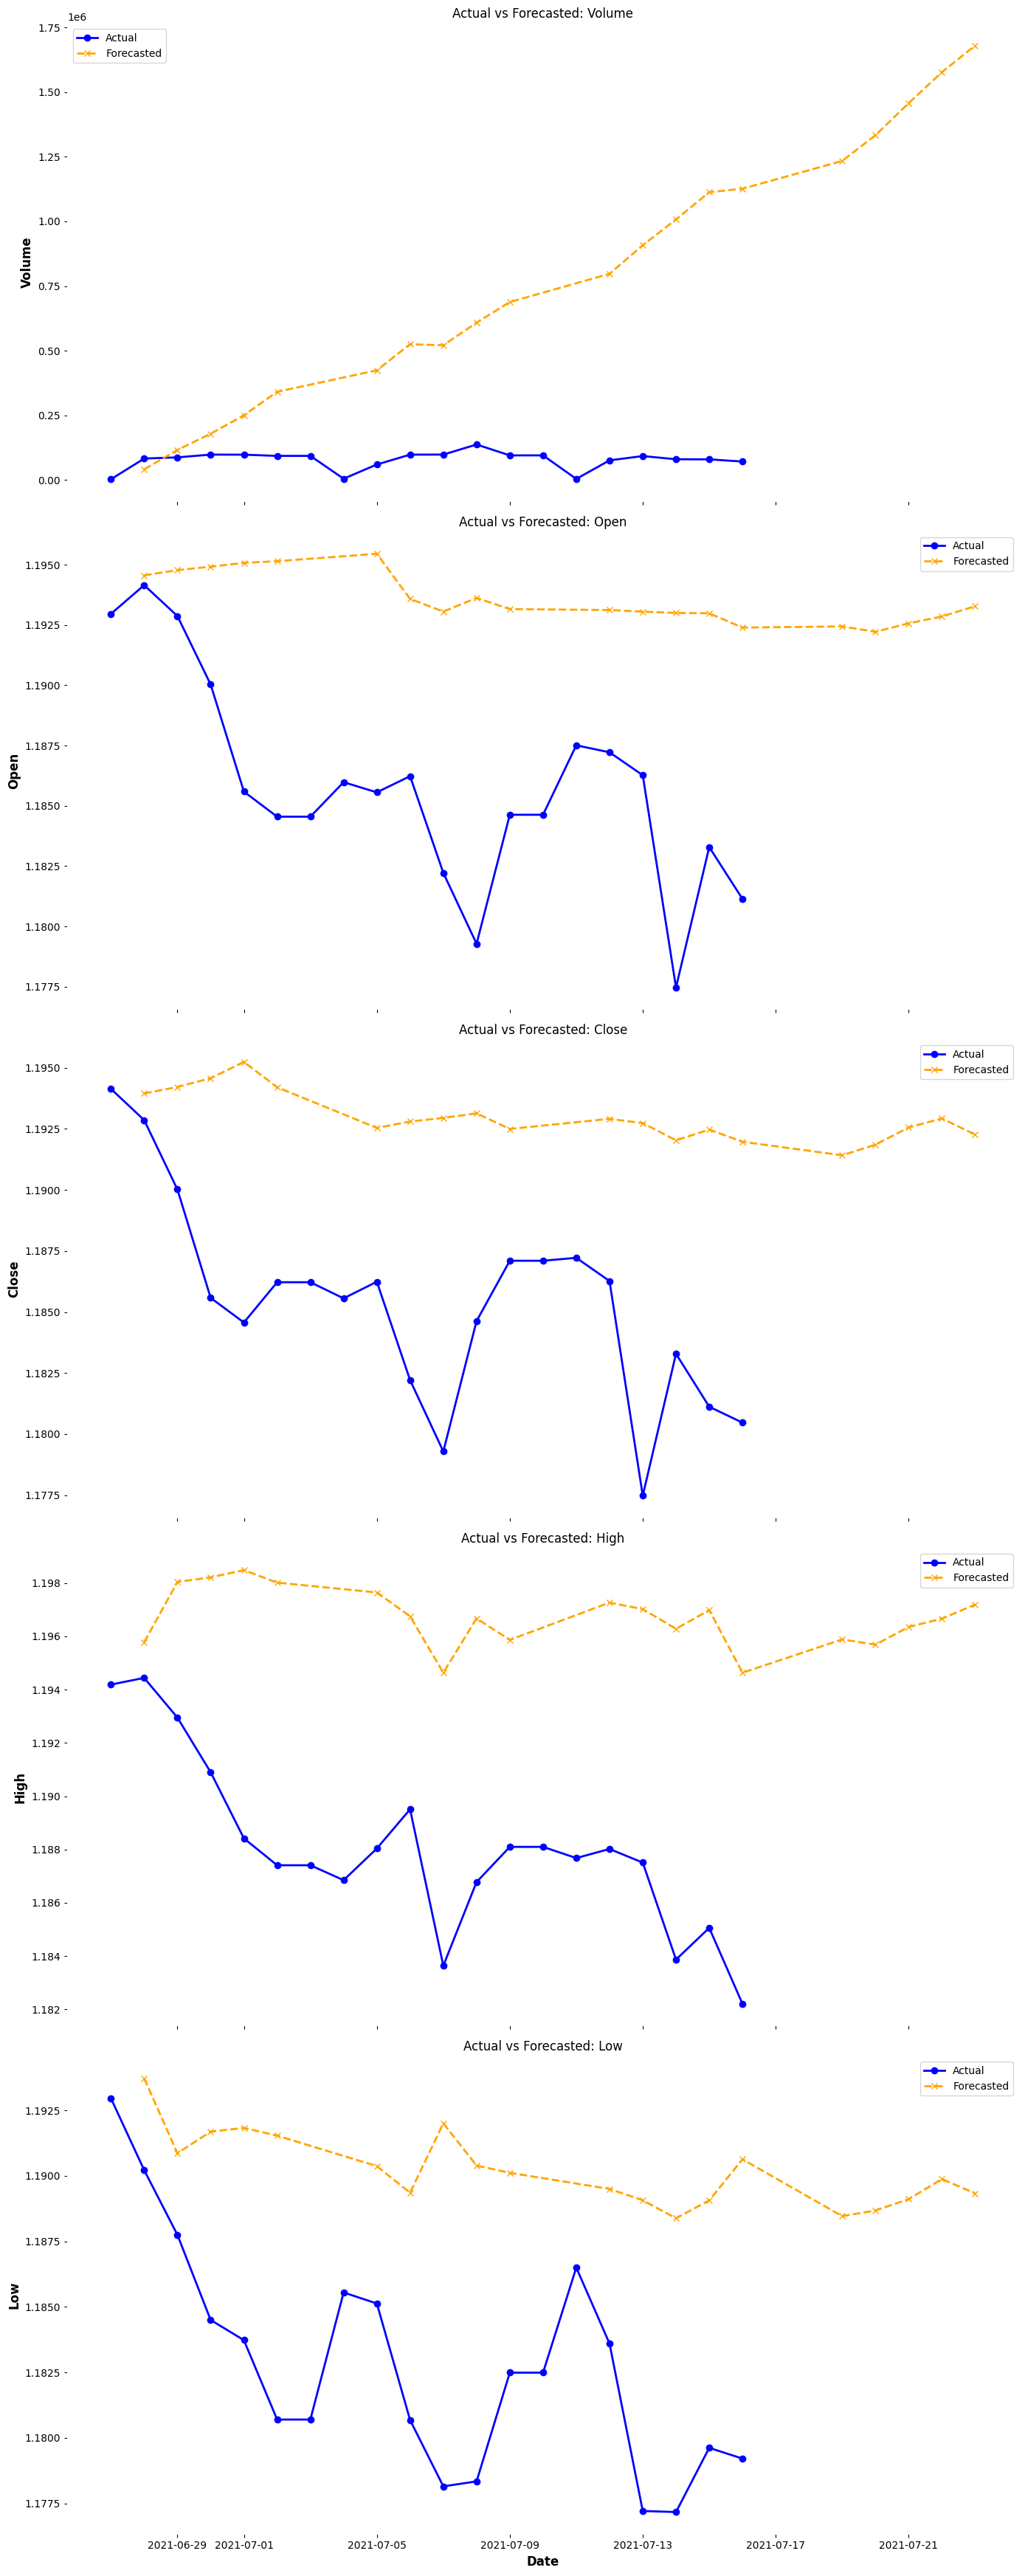

In [177]:
# Identify common columns
common_columns = set(actual_last_20.columns).intersection(set(inverse_forecast_df.columns))

# Prepare the data for plotting by extracting actual and forecasted values for common columns
plot_data = {}
for column in common_columns:
  if column not in ['Principal Component 0','Principal Component 1','Principal Component 2','Principal Component 3',
                    'Principal Component 4','Principal Component 5','Principal Component 6','Principal Component 7']:
    actual_values = actual_last_20[column]
    forecasted_values = inverse_forecast_df[column]
    plot_data[column] = (actual_values, forecasted_values)

# Create a figure for plotting
fig, axs = plt.subplots(nrows=len(plot_data), ncols=1, figsize=(14, 7 * len(plot_data)), sharex=True)

# Loop through each common column and create subplots
for i, (column, (actual, forecasted)) in enumerate(plot_data.items()):
  if column not in  ['Principal Component 0','Principal Component 1','Principal Component 2','Principal Component 3',
                    'Principal Component 4','Principal Component 5','Principal Component 6','Principal Component 7']:
    axs[i].plot(actual.index, actual, label='Actual', color='blue', marker='o')  # Actual values
    axs[i].plot(forecasted.index, forecasted, label='Forecasted', color='orange', linestyle='--', marker='x')  # Forecasted values
    axs[i].set_title(f'Actual vs Forecasted: {column}')
    axs[i].set_ylabel(column)
    axs[i].legend()
    axs[i].grid()

# Set common x-label for all subplots
axs[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()